# 决策树处理回归任务

实验内容
1.	使用sklearn.tree.DecisionTreeRegressor完成鲍鱼年龄预测问题
2.	计算最大深度为10的决策树，训练集上十折交叉验证的MAE和RMSE
3.	绘制最大深度从1到30，决策树在训练集和测试集上MAE的变化曲线
4.  选择一个合理的树的最大深度，并给出理由

## 1. 读取数据

In [1]:
import pandas as pd
import numpy as np
data = np.loadtxt('data/Abalone.csv', delimiter = ",")

## 2.数据集划分

In [4]:
from sklearn.utils import shuffle
data_shuffled = shuffle(data, random_state = 32)
split_line = int(len(data_shuffled) * 0.7)
training_data = data_shuffled[:split_line]
testing_data = data_shuffled[split_line:]

## 3.导入模型

In [5]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [6]:
from sklearn.tree import DecisionTreeRegressor

## 4.训练与预测

In [15]:
# YOUR CODE HERE
model = DecisionTreeRegressor(max_depth = 10)
x = training_data[:,0:-1]
y = training_data[:,-1]
prediction = cross_val_predict(model,x,y,cv = 10)

mae = round(mean_absolute_error(y, prediction),2)
rmse = round(mean_squared_error(y, prediction) ** 0.5,2)
mse = round(mean_squared_error(y, prediction),2)

print(mae)
print(rmse)
print(mse)

1.85
2.68
7.17


###### 最大深度为10
全量特征的决策树，十折交叉验证指标

MAE|RMSE|MSE
-|-|-
1.84|2.66|7.17

## 5. 改变最大深度，绘制决策树的精度变换图

绘制最大深度从1到30，决策树训练集和测试集MAE的变化图

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")

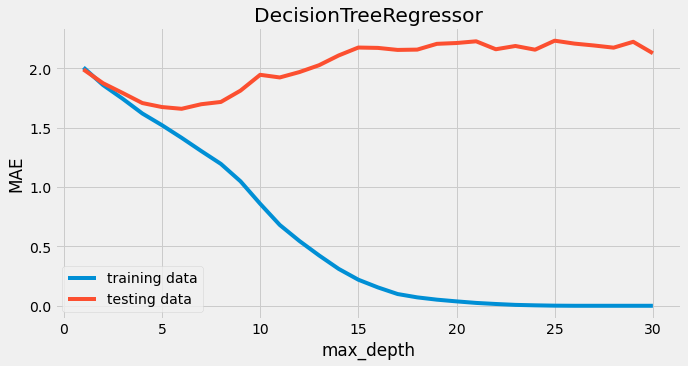

In [13]:
# YOUR CODE HERE
train_result = []
test_result = []

for i in range(30):
    model = DecisionTreeRegressor(max_depth = i + 1)
    model.fit(training_data[:,0:-1],training_data[:,-1])
    prediction1 = model.predict(training_data[:,0:-1])
    prediction2 = model.predict(testing_data[:,0:-1])
    train_result.append(mean_absolute_error(prediction1, training_data[:,-1]))
    test_result.append(mean_absolute_error(prediction2, testing_data[:,-1]))

depth = np.linspace(1,30,30)

plt.figure(figsize = (10, 5))
plt.plot(depth,train_result, '-', label = 'training data')
plt.plot(depth,test_result, '-', label = 'testing data')
plt.xlabel("max_depth")
plt.ylabel('MAE')
plt.title("DecisionTreeRegressor")
plt.legend()

在训练集中，随着最大深度的增大,mae值变小,模型在训练集上的预测效果越来越好,但模型在训练集上表现的过好会导致模型的过拟合,所以在测试集上随着最大深度的增大,mae值趋势是变大的,说明从深度10开始模型出现了过拟合的情况,可见最大深度选10比较好。